In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
from math import sin, cos, pi, log10, log2, e

In [2]:
'''
Погрешность метода численного интегрирования
с помощью составной формулы Симпсона
4-го порядка на интервале от a до b по n
узлам
'''
def error_method_O_4(a, b, n, diff_f):
    h = (b - a) / n
    interval_a_b = np.arange(a, b)
    M = [abs(diff_f(x_i)) for x_i in interval_a_b]
    return (b - a) * (h**4) * max(M) / 180
   
'''
Функция, которая вычисляет производню четвертой
степени функции f от x
'''
def diff_f_4(x):
    return 27 * (3 * x**2 * sin(3 * x) - 8 * x * cos(3 * x) - 4 * sin(3 * x))
 
'''
Функция f(x) = x^2 * sin(3x)
'''
def f(x):
    return x**2 * sin(3 * x)
 
'''
Функция, которая вычисляет интеграл функции f
от x
'''
def integral_f(x):
    return (2 * x * sin(3 * x)) / 9 - ((9 * x**2 - 2) * cos(3 * x)) / 27
 
'''
Функция, которая вычисляет определенный
интеграл на интервале от a до b
'''
def definite_integral_f(a, b):
    return integral_f(b) - integral_f(a)
 
'''
Функция численного интегрирования функции f
на интервале [a; b] по n узлам с помощью
составной формулы Симпсона
'''
def composite_simpson(a, b, n, f) :
    m = n // 2
    h = (b - a) / n
    x = [a + i * h for i in range(n + 1)]
 
    summ_odd = sum([f(x[2 * i]) for i in range(1, m)]) # нечётная
    summ_even = sum([f(x[2 * i - 1]) for i in range(1, m + 1)]) # чётная
 
    integr_f = (h / 3) * (f(x[0]) + 2 * summ_odd + 4 * summ_even + f(x[n]))
 
    return integr_f
 
'''
Абсолютная погрешность метода численного
интегрирования num_integral_f функции f
от a до b по n узлам
'''
def absolute_error_E(a, b, n, f, definite_integral_f, num_integral_f):
    h = (b - a) / n
    return abs(definite_integral_f(a, b) - num_integral_f(a, b, n, f))

In [4]:
'''
Вычисления
'''
a = 0
b = pi
low_border = 4 # 2^2
high_border = 4194304 # 2^22
n = np.logspace(log2(low_border), log2(high_border), 21, True, 2, int)
h = [(b - a) / n_i for n_i in reversed(n)]
n_o = np.logspace(2, 14, 13, True, 2, int)
h_o = [(b - a) / n_i for n_i in reversed(n_o)]
E = [absolute_error_E(a, b, int(n_i), f, definite_integral_f, composite_simpson) for n_i in reversed(n)]
O = [error_method_O_4(a, b, int(n_i), diff_f_4) for n_i in reversed(n_o)]
 
mini = E[0]
for i in range(0, 21):
    if E[i] < mini:
        mini = E[i]
        mini_h = h[i]
print(mini)
print(mini_h)
#eps = sys.float_info.epsilon
#/h_opt = (30 * eps / (4 * 7 * exp(2)))**(1 / 5)
#print(h_opt)

0.0
2.3968449810713143e-05


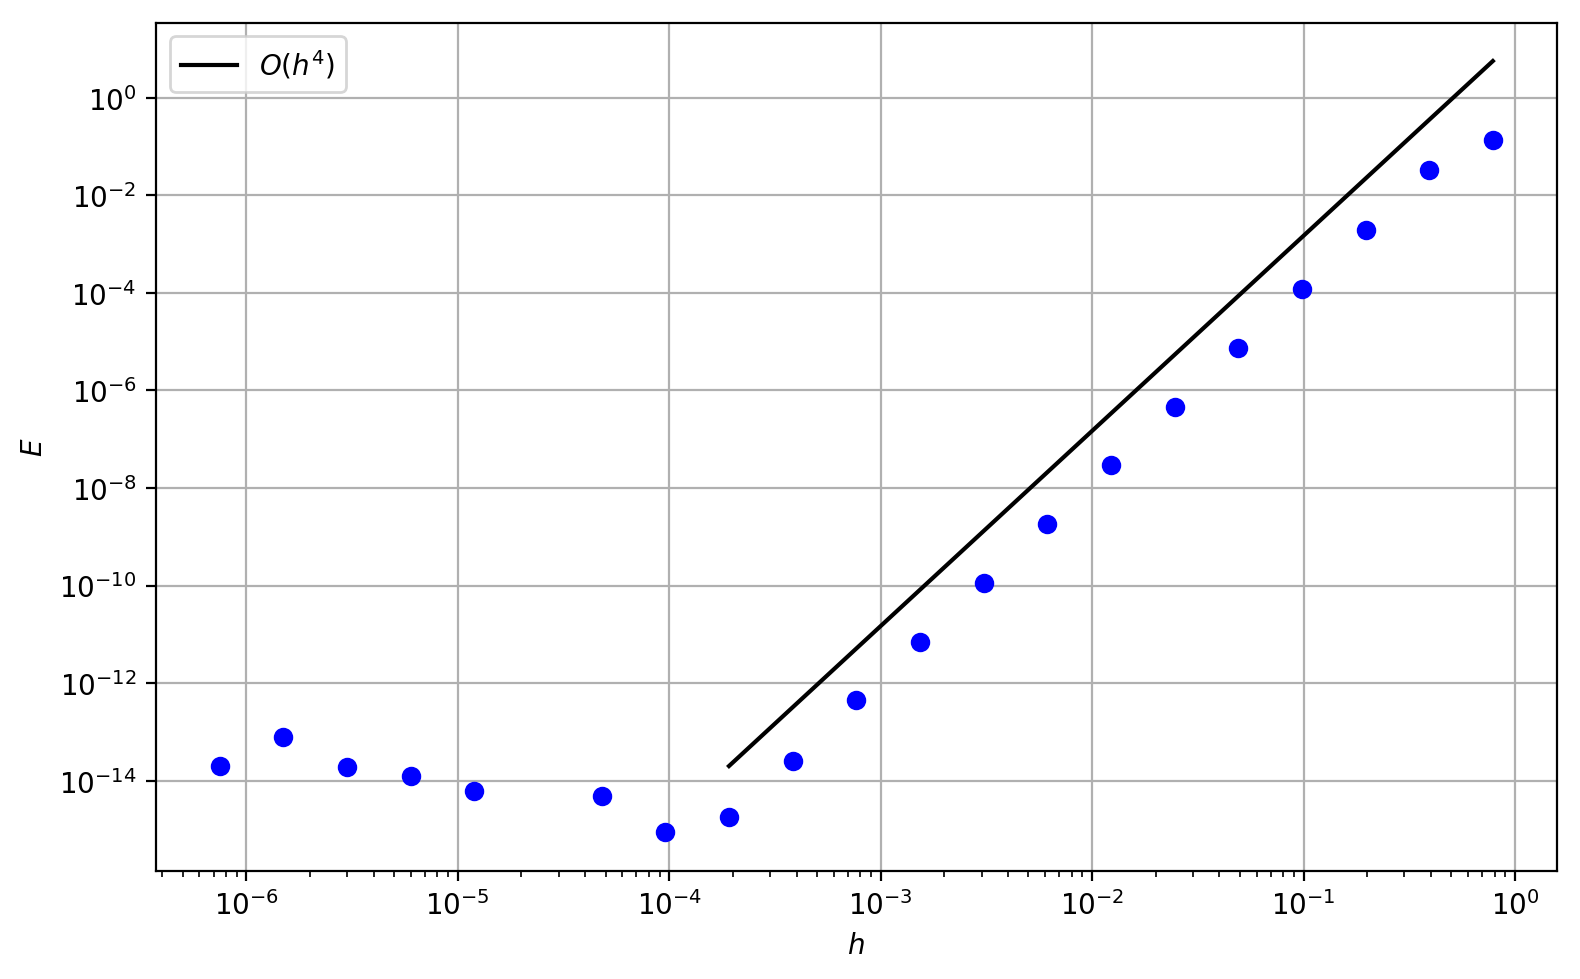

In [5]:
'''
Вывод
'''
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), dpi=200)
axes.loglog(h, E,'o', color="blue")
axes.loglog(h_o, O, linestyle = "-", color="black", label="$O({h^4})$")
axes.set_xlabel('$h$')
axes.set_ylabel('$E$')
axes.legend(loc='upper left');
axes.grid()
fig.tight_layout()
plt.show()
#fig.savefig("numerical_integration.png")